### 导入pytorch包

In [25]:
import numpy as np
import matplotlib.pyplot as plt

### 定义需要拟合的函数

In [26]:
def true_function(x):
    return 3*x**3+ x**2 + 2*x + 1

### 生成训练集和测试集

In [27]:
np.random.seed(0)# 保证实验结果可以复现

# 采样1000个点作为训练集
x_train = np.random.uniform(-10, 10, 1000).reshape(-1, 1)
y_train = true_function(x_train) 

# 采样200个点作为测试集
x_test = np.random.uniform(-10, 10, 200).reshape(-1, 1)
y_test = true_function(x_test)



### 定义神经网络模型

In [28]:
class SimpleNN:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # 初始化权重和偏置
        self.weights = {
            'W1': np.random.randn(input_size, hidden_size) * 0.01,
            'b1': np.zeros((1, hidden_size)),
            'W2': np.random.randn(hidden_size, output_size) * 0.01,
            'b2': np.zeros((1, output_size))
        }
    
    def relu(self, x):
        return np.maximum(0, x)
    
    def forward(self, x):
        # 前向传播
        h1 = self.relu(np.matmul(x, self.weights['W1']) + self.weights['b1'])
        output = np.matmul(h1, self.weights['W2']) + self.weights['b2']
        return output, h1
    
    def compute_loss(self, y_pred, y_true):
        return np.mean((y_pred - y_true)**2)
    
    def compute_gradients(self, x, y_true, y_pred, h1):
        m = x.shape[0]
        
        # 计算输出层的梯度
        dloss = 2 * (y_pred - y_true) / m
        dW2 = np.dot(h1.T, dloss)
        db2 = np.sum(dloss, axis=0, keepdims=True)
        
        # 计算隐藏层的梯度
        drelu = (np.dot(dloss, self.weights['W2'].T) > 0) * 1
        dW1 = np.dot(x.T, drelu * np.dot(dloss, self.weights['W2'].T))
        db1 = np.sum(drelu * np.dot(dloss, self.weights['W2'].T), axis=0, keepdims=True)
        
        return {'W1': dW1, 'b1': db1, 'W2': dW2, 'b2': db2}
    
    def train(self, x_train, y_train, learning_rate=0.001, num_epochs=50):
        from tqdm import trange
        for epoch in trange(num_epochs):
            # 前向传播
            y_pred, h1 = self.forward(x_train)
            
            # 计算损失
            loss = self.compute_loss(y_pred, y_train)
            
            # 计算梯度
            gradients = self.compute_gradients(x_train, y_train, y_pred, h1)
            
            # 更新权重
            self.weights['W1'] -= learning_rate * gradients['W1']
            self.weights['b1'] -= learning_rate * gradients['b1']
            self.weights['W2'] -= learning_rate * gradients['W2']
            self.weights['b2'] -= learning_rate * gradients['b2']
    
    def evaluate(self, x_test, y_test):
        # 在测试集上评估模型
        y_pred, _ = self.forward(x_test)
        test_loss = self.compute_loss(y_pred, y_test)
        print(f'Test Loss: {test_loss:.4f}')
        return y_pred
    
    def plot_results(self, x_test, y_test, y_pred):
        # 绘制拟合效果
        plt.scatter(x_test, y_test, label='True Data')
        plt.scatter(x_test, y_pred, color='red', label='Predicted Data')
        plt.legend()
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.title('Model Fitting Result')
        plt.show()

### 训练

In [29]:
# 实例化模型并训练
model = SimpleNN(input_size=1, hidden_size=128, output_size=1)
model.train(x_train, y_train, learning_rate=0.0001, num_epochs=5000)



100%|██████████| 5000/5000 [00:09<00:00, 552.23it/s]


### 测试

Test Loss: 22939.5388


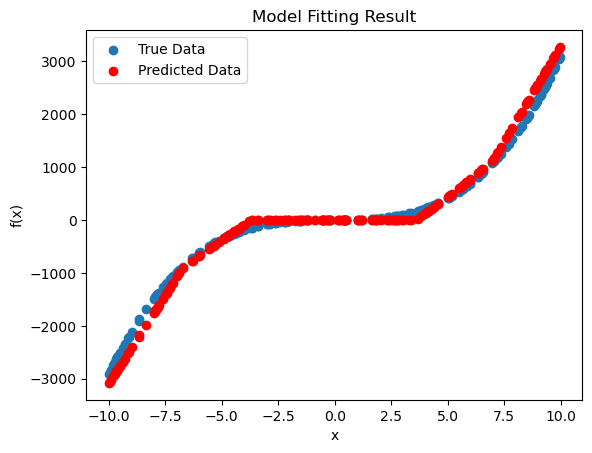

In [30]:
# 在测试集上评估模型并绘制结果
y_pred = model.evaluate(x_test, y_test)
model.plot_results(x_test, y_test, y_pred)